hist函数的参数解读
   
绘图之前，我们先来讲解一下matplotlib包中hist函数的参数含义及使用方法：

# 一元直方图的绘制

案例：titanic数据集

整体乘客的年龄直方图

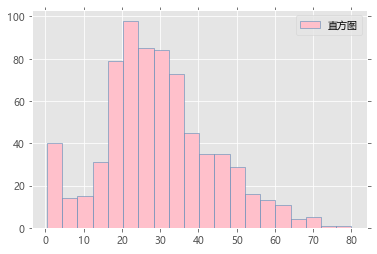

In [1]:
# 导入第三方包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

# 中文和负号的正常显示
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取Titanic数据集
#titanic = pd.read_csv('D:/数据分析数据/titanic_train.csv')  有中文可能会报错 改为如下
f = open('D:/数据分析数据/titanic_train.csv')
titanic = pd.read_csv(f)
# 检查年龄是否有缺失any(titanic.Age.isnull())
# 不妨删除含有缺失年龄的观察
titanic.dropna(subset=['Age'], inplace=True)

# 设置图形的显示风格
plt.style.use('ggplot')
# 绘图：乘客年龄的频数直方图
plt.hist(titanic.Age, # 绘图数据
        bins = 20, # 指定直方图的条形数为20个
        color = 'pink', # 指定填充色
        edgecolor = 'steelblue', # 指定直方图的边界色
        label = '直方图' )# 为直方图呈现标签

# 去除图形顶部边界和右边界的刻度
plt.tick_params(top='off', right='off')
# 显示图例
plt.legend()
# 显示图形
plt.show()

上图绘制的是年龄的频数直方图，从整体的分布来看，有点像正态分布，两边低中间高的倒钟形状。除此，我们还可以绘制累计频率直方图，并且设置5岁为组距，如下代码可以表示成：

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


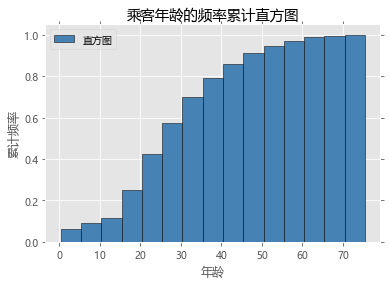

In [2]:
# 绘图：乘客年龄的累计频率直方图
plt.hist(titanic.Age, # 绘图数据
        bins = np.arange(titanic.Age.min(),titanic.Age.max(),5), # 指定直方图的组距
        normed = True, # 设置为频率直方图
        cumulative = True, # 积累直方图
        color = 'steelblue', # 指定填充色
        edgecolor = 'k', # 指定直方图的边界色
        label = '直方图' )# 为直方图呈现标签

# 设置坐标轴标签和标题
plt.title('乘客年龄的频率累计直方图')
plt.xlabel('年龄')
plt.ylabel('累计频率')

# 去除图形顶部边界和右边界的刻度
plt.tick_params(top='off', right='off')

# 显示图例
plt.legend(loc = 'best')
# 显示图形
plt.show()

通过累计频率直方图就可以快速的发现什么年龄段的人数占了多少比重，例如35岁以下的乘客占了7成，这种图的解读有点像帕累托图。为了测试数据集是否近似服从正态分布，需要在直方图的基础上再绘制两条线，一条表示理论的正态分布曲线，另一条为核密度曲线，目的就是比较两条曲线的吻合度，越吻合就说明数据越近似于正态分布。接下来我们就在直方图的基础上再添加两条曲线：

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


AttributeError: module 'matplotlib.mlab' has no attribute 'normpdf'

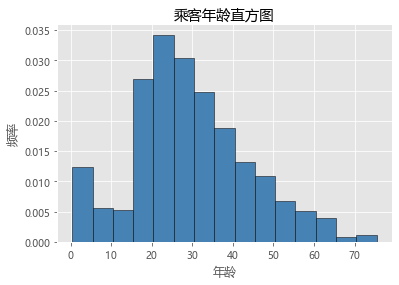

In [3]:
# 正态分布图
plt.hist(titanic.Age, # 绘图数据
        bins = np.arange(titanic.Age.min(),titanic.Age.max(),5), # 指定直方图的组距
        normed = True, # 设置为频率直方图
        color = 'steelblue', # 指定填充色
        edgecolor = 'k') # 指定直方图的边界色

# 设置坐标轴标签和标题
plt.title('乘客年龄直方图')
plt.xlabel('年龄')
plt.ylabel('频率')

# 生成正态曲线的数据
x1 = np.linspace(titanic.Age.min(), titanic.Age.max(), 1000)
normal = mlab.normpdf(x1, titanic.Age.mean(), titanic.Age.std())
# 绘制正态分布曲线
line1, = plt.plot(x1,normal,'r-', linewidth = 2) 

# 生成核密度曲线的数据
kde = mlab.GaussianKDE(titanic.Age)
x2 = np.linspace(titanic.Age.min(), titanic.Age.max(), 1000)
# 绘制
line2, = plt.plot(x2,kde(x2),'g-', linewidth = 2)

# 去除图形顶部边界和右边界的刻度
plt.tick_params(top='off', right='off')

# 显示图例
plt.legend([line1, line2],['正态分布曲线','核密度曲线'],loc='best')
# 显示图形
plt.show()

从直方图的展现来看，乘客的年龄分布与理论正态分布曲线存在一些差异，说明不服从正态分布。

# 二元直方图的绘制

上面绘制的直方图都是基于所有乘客的年龄，如果想对比男女乘客的年龄直方图的话，我们可以通过两个hist将不同性别的直方图绘制到一张图内，具体代码如下：

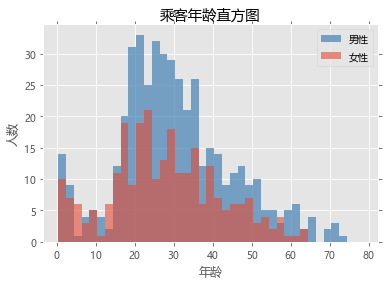

In [4]:
# 提取不同性别的年龄数据
age_female = titanic.Age[titanic.Sex == 'female']
age_male = titanic.Age[titanic.Sex == 'male']

# 设置直方图的组距
bins = np.arange(titanic.Age.min(), titanic.Age.max(), 2)
# 男性乘客年龄直方图
plt.hist(age_male, bins = bins, label = '男性', color = 'steelblue', alpha = 0.7)
# 女性乘客年龄直方图
plt.hist(age_female, bins = bins, label = '女性', alpha = 0.6)

# 设置坐标轴标签和标题
plt.title('乘客年龄直方图')
plt.xlabel('年龄')
plt.ylabel('人数')

# 去除图形顶部边界和右边界的刻度
plt.tick_params(top='off', right='off')

# 显示图例
plt.legend()
# 显示图形
plt.show()

图中结果反映了，不同年龄组内几乎都是男性乘客比女性乘客要多；同时，也说明男女性别的年龄组分布几乎一致。